In [ ]:
#About Jacknife:

#ImportError: cannot import name 'bootstrap' from 'scipy.stats
#pip install -U scipy

# Practice 2. Sample size. Robust regressions.

## Data

Again, the TIMSS 2019 data. We will use the data for United Arab Emirates.
Data is already prepared as file **timss_all_data.csv** (preparation is the same as in the previous practice)


Columns:

+ math score - maths score (Mathematics Achievement, points scored by the student for tasks in mathematics)
+ sex - boy\girl (0\1)
+ education - Highest education of the parents
+ interest - interest in maths (from not interested at all to love to maths )
+ teaching - Teaching assessment (from he/she help to not clear, no help, not interesting to teacher’s explanations are clear and interesting things learned)
+ success - success in maths (from no success to success)
+ importance - attitude to maths, its importance for life (from not important at all to very important)

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('timss_uae.csv')

In [5]:
data = data[['math_score', 'sex', 'education', 'interest', 'teaching', 'success', 'importance']]

In [6]:
data.head()

,math_score,sex,education,interest,teaching,success,importance
0,536.92562,0,University or Higher,3.666667,3.571429,2.888889,3.555556
1,378.99368,0,Post-Secondary,3.555556,3.571429,2.888889,3.555556
2,509.67676,0,Post-Secondary,3.333333,3.285714,2.777778,3.555556
3,357.27753,0,Post-Secondary,3.222222,3.571429,2.666667,3.555556
4,337.74524,0,Post-Secondary,3.666667,2.714286,2.777778,2.666667


Let's make 3 more datasets of different size.

In [7]:
data100 = data.sample(n=100, random_state=1)
data700 = data.sample(n=700, random_state=1)
data5000 = data.sample(n=5000, random_state=1)

## Testing Hypotheses

In [8]:
from scipy import stats

### Simple tests

1. There is no differences in math score between girls and boys.

full data

In [9]:
# Welch t-test
res = stats.ttest_ind(data[data['sex'] == 0]['math_score'], 
                      data[data['sex'] == 1]['math_score'], 
                      equal_var=False)
print(res)

Ttest_indResult(statistic=4.716614450989327, pvalue=2.4171381155317728e-06)


100 observations

In [10]:
res = stats.ttest_ind(data100[data100['sex'] == 0]['math_score'], 
                      data100[data100['sex'] == 1]['math_score'], 
                      equal_var=False)
print(res)

Ttest_indResult(statistic=0.6185704149187845, pvalue=0.5378452969280991)


700 observations

In [11]:
res = stats.ttest_ind(data700[data700['sex'] == 0]['math_score'], 
                      data700[data700['sex'] == 1]['math_score'], 
                      equal_var=False)
print(res)

Ttest_indResult(statistic=-0.17516869053536618, pvalue=0.8609980992603705)


5000 observations

In [12]:
res = stats.ttest_ind(data5000[data5000['sex'] == 0]['math_score'], 
                      data5000[data5000['sex'] == 1]['math_score'], 
                      equal_var=False)
print(res)

Ttest_indResult(statistic=2.645970108713191, pvalue=0.008171817565421579)


### Linear Regression

Target variable - math score

In [13]:
import statsmodels.formula.api as smf
import numpy as np

In [14]:
import statsmodels.formula.api as smf

m_full = smf.ols(formula="math_score ~ C(sex) + interest + teaching + success + importance + C(education, Treatment('Secondary or lower'))", 
                 data=data).fit()
m_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math_score   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     433.2
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:50:26   Log-Likelihood:            -1.0253e+05
No. Observations:               17368   AIC:                         2.051e+05
Df Residuals:                   17359   BIC:                         2.051e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                               311.7881      4.528     68.858      0.000     302.913     320.663
C(sex)[T.1]                                                             -10.2230      1.359     -7.525      0.000     -12.886      -7.560
C(education, Treatment('Secondary or lower'))[T.Don't Know]              28.0868      2.053     13.679      0.000      24.062      32.111
C(education, Treatment('Secondary or lower'))[T.Post-Secondary]          33.3142      2.551     13.060      0.000      28.314      38.314
C(education, Treatment('Secondary or lower'))[T.University or Higher]    67.5929      2.019     33.482      0.000      63.636      71.550
interest                                                                -15.4473      1.538    -10.047      0.000     -18.461     -12.434
teaching                                                                 16.9601      1.235     13.731      0.000      14.539      19.381
success                                                                  36.9308      1.183     31.231      0.000      34.613      39.249
importance                                                                4.4650      1.298      3.440      0.001       1.921       7.009
==============================================================================
Omnibus:                      119.298   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.276
Skew:                          -0.109   Prob(JB):                     1.24e-21
Kurtosis:                       2.708   Cond. No.                         45.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
m_100 = smf.ols(formula="math_score ~ C(sex) + interest + teaching + success + importance + C(education, Treatment('Secondary or lower'))", 
                 data=data100).fit()
m_100.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math_score   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     3.978
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           0.000445
Time:                        16:50:29   Log-Likelihood:                -583.53
No. Observations:                 100   AIC:                             1185.
Df Residuals:                      91   BIC:                             1209.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                               260.1179     65.738      3.957      0.000     129.538     390.698
C(sex)[T.1]                                                             -14.0240     18.236     -0.769      0.444     -50.247      22.199
C(education, Treatment('Secondary or lower'))[T.Don't Know]              50.7833     26.793      1.895      0.061      -2.438     104.004
C(education, Treatment('Secondary or lower'))[T.Post-Secondary]          35.5633     30.160      1.179      0.241     -24.347      95.473
C(education, Treatment('Secondary or lower'))[T.University or Higher]    96.1762     26.523      3.626      0.000      43.491     148.861
interest                                                                -11.3223     23.354     -0.485      0.629     -57.713      35.069
teaching                                                                 16.3977     20.218      0.811      0.419     -23.764      56.559
success                                                                  44.2659     16.524      2.679      0.009      11.443      77.089
importance                                                                5.0002     21.162      0.236      0.814     -37.035      47.036
==============================================================================
Omnibus:                        0.754   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.686   Jarque-Bera (JB):                0.870
Skew:                           0.183   Prob(JB):                        0.647
Kurtosis:                       2.725   Cond. No.                         50.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
m_700 = smf.ols(formula="math_score ~ C(sex) + interest + teaching + success + importance + C(education, Treatment('Secondary or lower'))", 
                 data=data700).fit()
m_700.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math_score   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     16.18
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           5.03e-22
Time:                        16:50:30   Log-Likelihood:                -4142.1
No. Observations:                 700   AIC:                             8302.
Df Residuals:                     691   BIC:                             8343.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                               321.3466     23.661     13.581      0.000     274.891     367.802
C(sex)[T.1]                                                               0.1481      6.975      0.021      0.983     -13.547      13.843
C(education, Treatment('Secondary or lower'))[T.Don't Know]              31.1250     10.337      3.011      0.003      10.830      51.420
C(education, Treatment('Secondary or lower'))[T.Post-Secondary]          29.9764     12.122      2.473      0.014       6.175      53.778
C(education, Treatment('Secondary or lower'))[T.University or Higher]    68.3319     10.187      6.708      0.000      48.331      88.333
interest                                                                -23.3458      7.411     -3.150      0.002     -37.896      -8.795
teaching                                                                 16.1719      6.803      2.377      0.018       2.815      29.528
success                                                                  40.9529      6.058      6.760      0.000      29.059      52.847
importance                                                                2.8954      6.417      0.451      0.652      -9.704      15.495
==============================================================================
Omnibus:                        2.406   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                2.100
Skew:                           0.023   Prob(JB):                        0.350
Kurtosis:                       2.736   Cond. No.                         46.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
m_5000 = smf.ols(formula="math_score ~ C(sex) + interest + teaching + success + importance + C(education, Treatment('Secondary or lower'))", 
                 data=data5000).fit()
m_5000.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math_score   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     132.0
Date:                Fri, 16 Sep 2022   Prob (F-statistic):          1.38e-201
Time:                        16:50:33   Log-Likelihood:                -29495.
No. Observations:                5000   AIC:                         5.901e+04
Df Residuals:                    4991   BIC:                         5.907e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                               314.3728      8.507     36.953      0.000     297.695     331.051
C(sex)[T.1]                                                             -10.2016      2.527     -4.036      0.000     -15.156      -5.247
C(education, Treatment('Secondary or lower'))[T.Don't Know]              30.8635      3.807      8.107      0.000      23.400      38.327
C(education, Treatment('Secondary or lower'))[T.Post-Secondary]          35.6516      4.682      7.615      0.000      26.473      44.830
C(education, Treatment('Secondary or lower'))[T.University or Higher]    73.9682      3.749     19.733      0.000      66.619      81.317
interest                                                                -15.3592      2.815     -5.457      0.000     -20.877      -9.841
teaching                                                                 14.6624      2.319      6.324      0.000      10.117      19.208
success                                                                  37.5497      2.238     16.777      0.000      33.162      41.938
importance                                                                4.0534      2.462      1.646      0.100      -0.773       8.880
==============================================================================
Omnibus:                       39.449   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.773
Skew:                          -0.131   Prob(JB):                     7.65e-08
Kurtosis:                       2.703   Cond. No.                         45.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Robust measures

Robust measures of scale are methods that quantify the statistical dispersion in a sample of numerical data while *resisting outliers*. 

The most common such robust statistics are **the interquartile range (IQR)** and **the median absolute deviation (MAD)**. These are contrasted with conventional or non-robust measures of scale, such as sample variance or standard deviation, which are greatly influenced by outliers.



**The interquartile range (IQR)**: the difference between the 75th percentile and the 25th percentile of a sample

In [18]:
q3, q1 = np.percentile(data['math_score'], [75 ,25])
iqr = q3 - q1

<AxesSubplot:>

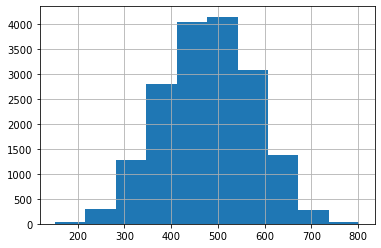

In [20]:
data['math_score'].hist()

In [19]:
iqr

138.99698750000005

**Robust Regressions**

https://www.statsmodels.org/devel/rlm.html

Huber, RANSAC, TheilSen


Huber regression - Square error for inliers, linear for outliers.

In [ ]:
# Huber Regression

import statsmodels.api as sm
Y = data['math_score']
X = sm.add_constant(pd.concat([data[['sex', 'interest', 
                                     'teaching', 'success', 'importance']], 
                               pd.get_dummies(data['education'])[["Don't Know", "Post-Secondary", 
                                                                  "University or Higher"]]], axis=1))

rlm = sm.RLM(Y, X, M=sm.robust.norms.HuberT()).fit()
print(rlm.summary())

## Multimodal data

read the following link about some methods for working with multimodal features:

https://www.kaggle.com/code/iamleonie/handling-multimodal-distributions-fe-techniques